## Statistical Data Science Project
### Group Members: Meilin Shi, Pedro Aristizabal, Jensen Newlin, Ao Yu Hsiao
## Text Analysis and Mining on Seattle Airbnb Review

### Introduction

In recent years, with the rising popularity of Airbnb, Airbnb reviews have been used to help people decide travel destinations and locations to stay in during their travels. With the listing information, the numeric ratings and user reviews, we can study the perceptions of people toward the quality of Airbnb, as well as the neighborhoods they are located in. We use the [*Seattle Airbnb Open Data*](https://www.kaggle.com/airbnb/seattle), available on Kaggle. The project will be divided into 4 parts, in which we will disect and prepare the data, analyse the descriptions of different neighborhoods in Seattle, use text mining to get a better understandings of user reviews, and compare changes in prices in different areas of the city.

The objective of this project is to get a better understanding of the Airbnb market in Seattle, where we try to find patterns within the reviews that can potentially show how user's reviews and preferences correlate to the type of neighborhood the Airbnbs are located in. We will try to get a sense of how travel destinations are connected with neighborhood perception and help potential users decide where to stay when visiting Seattle. 

### Data

#### Listings overview
* To provide an overview of our data and study area, below is a visualization of our total Airbnb listings.

In [1]:
conda install contextily --channel conda-forge

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
!pip -q install geopandas
!pip -q install contextily

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
import contextily as ctx ## if cannot install contextily, this line can be commented out, 
                         ##it is just used to show the basemap

listings = pd.read_csv("listings.csv")
location = listings[['latitude','longitude']]
location.to_csv("map.csv")

# The geojson file is converted from the map.csv above.
df = geopandas.read_file("seattle_airbnb.geojson")

# Projection of the coordinates using datum WGS 84
df = df.to_crs(epsg=3857)

ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, url=ctx.providers.Stamen.TonerLite) #if ctx doesn't work, can check the png in data folder
ax.set_axis_off()
fig = ax.get_figure()
fig.savefig('listing.png')

/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


#### Visualize listings by neighborhood
The neighborhood data frame consists of 3818 rows, which means there are 3818 unique listings. We select the "id", "latitude", "longitude", "neighborhood_overview", "neighbourhood", and "neighbourhood_group_cleansed" columns from the full dataset. To visualize the listings by neighborhood, we take the previous visualization shown above, and color code it by the different neighbors in Seattle they are located in.

In [3]:
neighborhood = listings[['id','latitude','longitude','neighborhood_overview',
                         'neighbourhood','neighbourhood_group_cleansed']]
neighborhood

,id,latitude,longitude,neighborhood_overview,neighbourhood,neighbourhood_group_cleansed
0,241032,47.636289,-122.371025,NaN,Queen Anne,Queen Anne
1,953595,47.639123,-122.365666,"Queen Anne is a wonderful, truly functional vi...",Queen Anne,Queen Anne
2,3308979,47.629724,-122.369483,Upper Queen Anne is a charming neighborhood fu...,Queen Anne,Queen Anne
3,7421966,47.638473,-122.369279,NaN,Queen Anne,Queen Anne
4,278830,47.632918,-122.372471,We are in the beautiful neighborhood of Queen ...,Queen Anne,Queen Anne
...,...,...,...,...,...,...
3813,8101950,47.664295,-122.359170,We're located near lots of family fun. Woodlan...,Fremont,Other neighborhoods
3814,8902327,47.649552,-122.318309,The neighborhood is a quiet oasis that is clos...,Portage Bay,Capitol Hill
3815,10267360,47.508453,-122.240607,NaN,NaN,Rainier Valley
3816,9604740,47.632335,-122.275530,Madison Park offers a peaceful slow pace upsca...,NaN,Capitol Hill


#### Geographical Representation of Listings by Neighborhoods

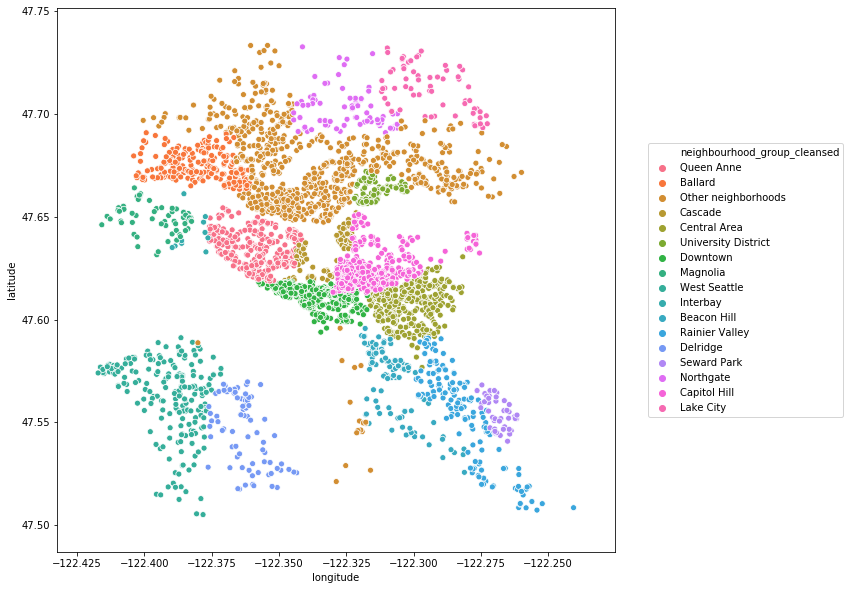

In [4]:
import seaborn as sns

plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="longitude", y="latitude", 
                     hue="neighbourhood_group_cleansed", data=neighborhood)
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
plt.show()

## Part One -  Data Exploration on Popularity of Airbnb in Seattle

After getting a visual aid of where the listings are, we want to explore where are the most popular destinations in Seattle. From the total listings information, we selected the apartments that have at least 150 reviews and sorted the *review_score_rating* from highest to lowest. There are a total of 65 listings. After finding out which places are the most popular based on their average review score, we created a graph to see in which neighborhoods these places are located.

In [5]:
y = listings[['id','latitude','longitude', 'neighbourhood','number_of_reviews',
              'review_scores_rating','neighbourhood_group_cleansed']].sort_values(by = ['number_of_reviews'], 
                                                                                  ascending = False)

#Pick the apartments that have at least 150 reviews
most_reviews = y[~(y['number_of_reviews'] <= 149)]

#Then arrange scores ratings from highest to lowest
best_ratings = most_reviews.sort_values(by = ['review_scores_rating'],ascending = False)

#Here you can see the most popular apartments
best_ratings 

,id,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,neighbourhood_group_cleansed
1094,706385,47.643390,-122.325822,Eastlake,188,100.0,Cascade
3581,1974131,47.621473,-122.311637,Capitol Hill,182,100.0,Capitol Hill
3058,3861673,47.684030,-122.374086,Ballard,175,99.0,Ballard
963,1171574,47.607811,-122.295767,Madrona,158,98.0,Central Area
3774,119103,47.651989,-122.350265,Fremont,210,98.0,Other neighborhoods
...,...,...,...,...,...,...,...
2690,279063,47.624650,-122.316889,Capitol Hill,294,91.0,Capitol Hill
2721,1790020,47.623607,-122.317235,Capitol Hill,193,90.0,Capitol Hill
2610,258571,47.615967,-122.326938,Capitol Hill,278,89.0,Capitol Hill
2764,719233,47.615451,-122.328741,Capitol Hill,255,85.0,Capitol Hill


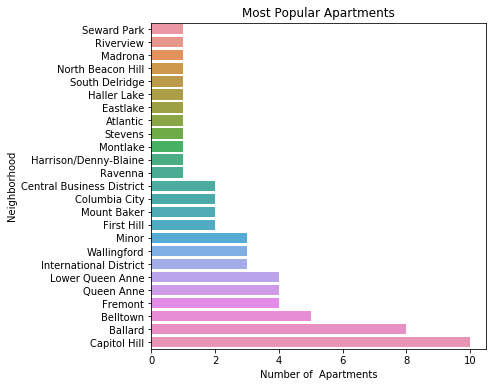

In [6]:
# plotted where the number of the most popular listings fall in each neighborhood

x = best_ratings.groupby(['neighbourhood']).size().sort_values(ascending=False)
plt.figure(figsize=(6,6))
ax = sns.countplot(data=best_ratings, y="neighbourhood",
                   order=best_ratings["neighbourhood"].value_counts(ascending=True).index);
ax.set_ylabel("Neighborhood")
ax.set_xlabel("Number of  Apartments")
ax.set_title("Most Popular Apartments");

## Part Two - Text mining on user reviews

#### Select the top five neighborhoods with most entries

Now that we have a bit of a better understanding of our data, we will narrow it down in order to start analyzing it. Based on our chart above, we decide to only focus on 5 neighborhoods with the most Airbnb listings, since most of them do not seem to be very active in terms of Airbnb population. We narrow our data down below.

In [7]:
neighborhood.dropna(inplace=True)
neighborhood.groupby('neighbourhood_group_cleansed').size().sort_values(ascending=False)[1:6]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


neighbourhood_group_cleansed
Capitol Hill    357
Downtown        311
Central Area    250
Queen Anne      196
Ballard         166
dtype: int64

In [8]:
Capitol_Hill = neighborhood[neighborhood['neighbourhood_group_cleansed']=='Capitol Hill']
Downtown = neighborhood[neighborhood['neighbourhood_group_cleansed']=='Downtown']
Central_Area =neighborhood[neighborhood['neighbourhood_group_cleansed']=='Central Area']
Queen_Anne = neighborhood[neighborhood['neighbourhood_group_cleansed']=='Queen Anne']
Ballard = neighborhood[neighborhood['neighbourhood_group_cleansed']=='Ballard']

After setting up our top 5 neighborhood data sets, we create a dataset with all the user reviews in Seattle, which we will call Reviews. We will mostly focus on the 'comments' column, which contains a user review for the Airbnb they stayed in during their time in Seattle.

Then, we go ahead and take the 'comments' column, and divide our data into 5 arrays. Each one of these arrays contains every review for an Airbnb for one of the Top 5 neighborhoods: Queen Anne, Ballard, Downtown, Capitol Hill or Central Area. By doing this, we narrow down and filter all the reviews from Seattle into just the reviews for the neighborhoods we want to focus.

In [9]:
reviews = pd.read_csv("reviews.csv")
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
...,...,...,...,...,...,...
84844,3624990,50436321,2015-10-12,37419458,Ryan,The description and pictures of the apartment ...
84845,3624990,51024875,2015-10-17,6933252,Linda,We had an excellent stay. It was clean and com...
84846,3624990,51511988,2015-10-20,19543701,Jaime,"Gran ubicación, cerca de todo lo atractivo del..."
84847,3624990,52814482,2015-11-02,24445024,Jørgen,"Very good apartement, clean and well sized. Si..."


In [10]:
#Dividing Reviews Dataset into subsets of reviews by neighborhood

#this will take some time, its a long process.

QA_id=np.array(Queen_Anne['id'])
QA_rvs = [reviews.iloc[i]['comments'] for i in range(len(reviews)) if reviews.iloc[i]['listing_id'] in QA_id]

B_id=np.array(Ballard['id'])
B_rvs = [reviews.iloc[i]['comments'] for i in range(len(reviews)) if reviews.iloc[i]['listing_id'] in B_id]

DT_id=np.array(Downtown['id'])
DT_rvs = [reviews.iloc[i]['comments'] for i in range(len(reviews)) if reviews.iloc[i]['listing_id'] in DT_id]

CH_id=np.array(Capitol_Hill['id'])
CH_rvs = [reviews.iloc[i]['comments'] for i in range(len(reviews)) if reviews.iloc[i]['listing_id'] in CH_id]

CA_id=np.array(Central_Area['id'])
CA_rvs = [reviews.iloc[i]['comments'] for i in range(len(reviews)) if reviews.iloc[i]['listing_id'] in CA_id]

### Text Mining & Preparations

Now that we have smaller datasets by neighborhood,we will perform text mining to explore user reviews for the Airbnb they stayed in.We normalize our text as preparation to analyze it. This process consists of tokenizing our text, which means dividing our text and sentences into singular words that our algorithms can understand.
Then, we will be lemmatizing it, which is a process of converting words to their roots in order to properly understand what function they have in the sentence, and how important it is within the text over all.
Finally, we will be getting rid of stop words in order to make it more readily accessible for text mining.
Below, we download and create all the functions that will make this process possible.

In [11]:
## Preprocessing data for text mining
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
import string
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pedroaristizabal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pedroaristizabal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
###Tokenizing text
def tokenize_text(text):
    tokens = nltk.word_tokenize(text) 
    tokens = [token.strip() for token in tokens]
    return tokens

##Downloading contraction mapping
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/contractions.py
from contractions import CONTRACTION_MAP


##Expansion of contractions
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        # not sure why below is there
        # expanded_contraction = first_char+expanded_contraction[1:] 
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

##Removal of special characters
def remove_special_characters(text):
    tokens = tokenize_text(text)
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    filtered_tokens = filter(None, [pattern.sub('', token) for token in tokens])
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Map of stop words
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

#removal of stop words
def remove_stopwords(text,stopword_list):
    tokens = tokenize_text(text)
    filtered_tokens = [token for token in tokens if token not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

nltk.download(['averaged_perceptron_tagger',
               'universal_tagset',
               'wordnet'])
from nltk import pos_tag
from nltk.corpus import wordnet as wn

# Annotate text tokens with POS tags
def pos_tag_text(text):
    
    def penn_to_wn_tags(pos_tag):
        if pos_tag.startswith('J'):
            return wn.ADJ
        elif pos_tag.startswith('V'):
            return wn.VERB
        elif pos_tag.startswith('N'):
            return wn.NOUN
        elif pos_tag.startswith('R'):
            return wn.ADV
        else:
            return None

    tagged_text = pos_tag(text)
    tagged_lower_text = [(word.lower(), penn_to_wn_tags(pos_tag))
                         for word, pos_tag in
                         tagged_text]
    return tagged_lower_text

# lemmatize text based on POS tags    
def lemmatize_text(text):
    text = tokenize_text(text)
    pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [wnl.lemmatize(word, pos_tag) if pos_tag
                         else word                     
                         for word, pos_tag in pos_tagged_text]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Text normalization pipeline
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
import re

def keep_text_characters(text):
    filtered_tokens = []
    tokens = tokenize_text(text)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def normalize_text(text,tokenize=False):
    text = expand_contractions(text, CONTRACTION_MAP)
    text = lemmatize_text(text)
    text = remove_special_characters(text)
    text = text.lower()
    text = remove_stopwords(text,ENGLISH_STOP_WORDS)
    text = keep_text_characters(text)

    return text

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pedroaristizabal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/pedroaristizabal/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pedroaristizabal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Now that our code is ready to normalize our reviews, we will go ahead and normalize each entry for the 5 arrays we created above, meaning we will normalize the reviews for every Airbnb within our top 5 neighborhoods. Since we are still looking at thousands of reviews per neighborhood, in order to keep our notebook from crashing due to lack of memory, we will create randomly assigned samples of the neighborhood reviews to make things more manageable. Our sample size for each neighborhood will be 1000, meaning we will only take into account this many reviews for each neighborhood. 

Our outcome of this process will be an array called Top5_rvs_normalized, which will have a length of 5. Each element in this array is another array holding the normalized samples for each of our neighborhoods, meaning each element inside Top5_rvs_normalized will have a length of 1000. This is a long proccess, and will take some time to run through. Then we will merge them into all_rvs_normalized, having a total of 5000 normalized reviews, 1000 from each neighborhood.

In [49]:
Top5_rvs=[QA_rvs,B_rvs,DT_rvs,CH_rvs,CA_rvs]  ##Joining all top 5 neighobrhood reviews into one array.


##Normalizing every review in each Neighborhood array

##Sample is taken to make computation manageable (1000 samples per neighborhood)
np.random.seed(13)

Top5_rvs_Normalized=[]
for neighborhood in range(5):
    neighborhood_sample=[Top5_rvs[neighborhood][i] for i 
                  in np.random.randint(0,len(Top5_rvs[neighborhood]),size=1000)]
    norm=[]
    for i in range(len(neighborhood_sample)):
        a=normalize_text(neighborhood_sample[i])
        norm.append(a)
        
    Top5_rvs_Normalized.append(norm)
    
##Top5_rvs_Normalized is a an array of 5 objects, each object being an array with a sample of normalized reviews
##for each neighborhood.

all_rvs_normalized=Top5_rvs_Normalized[0]+Top5_rvs_Normalized[1]+Top5_rvs_Normalized[2]+Top5_rvs_Normalized[3]+Top5_rvs_Normalized[4]

### Feature extraction

We now have a normalized sample of reviews for our top 5 neighborhoods. The next step is to extract the prominent features in each of these samples, in an attempt to see which features matter more in these reviews. This procces will hopefully help us see patterns and differences between the reviews in the neighborhoods, making it easy for a new user to see which types of reviews he finds useful, and therefore helping them find the appropriate neighborhood to stay in.

We will do this by running a TF-IDF model, which consists of measuring how frequently a word appears in a review in comparison to how often this word shows up throughout all the nighborhood reviews. This process help wind out common words that are not useful to us, while pointing out which ones are worth looking at. 

Below, we create a function to run an TF-IDF model. The input is simply the array of normalized reviews we gathered earlier, while the outputs will be the appropriate weights for each feature/word (how important it really is), as well as the 'name' of the feature, in this case the word itself.

In [50]:
# TF-IDF 
import numpy as np
from feature_extractors import tfidf_transformer
from feature_extractors import bow_extractor    

def tf_idf(corpus):
    # Bag of words construction
    bow_vectorizer, bow_features = bow_extractor(corpus=corpus)
    # feature names
    feature_names = bow_vectorizer.get_feature_names()
    # TF-IDF    
    tfidf_trans, tdidf_features = tfidf_transformer(bow_features)
    tdidf_features = np.round(tdidf_features.todense(),2)
    return((tdidf_features, feature_names))

After creating our model, we will now use a loop to run every neighborhood's normalized reviews through it, and save the results for each one in arrays Features and Names. Again, each array is made up of smaller arrays, with each holding the according Neighborhood's features and their names.

In [51]:
Features,Names=tf_idf(all_rvs_normalized)

### Topic modeling

We have now found the prominent features for each neighborhood's group of reviews, but what does that mean? To make sense of it, we will use a procedure called topic modeling, which consists of dividing all of our important features into several topics, in order to see what topics these reviews seem to talk about. By doing this, we will be able to see the different points and subjects the reviews are refering to. This will once again help to see how the reviews for one neighborhood differ to other neighborhoods in general, helping us understand the different aspects each neighborhood ahas to offer.

We will run this model through a Non-negative matrix decomposition, where the imput will be the number of topics we want to divide our data into, as well as the features we found earlier. The output will be the topic divisions the algortihm found, where we will look at the 10 most prominent and helpful words for each topic. Again, this is a long process, and will take some time to execute for each neighborhood.

After doing this, we will then compare our features with the resulting H matrix, which is a matrix holding the coefficients for each of the topics we divide into. We will do this to see how each neighborhood's weights distribution works, which will help us see which topic is more prominent in each neighborhood. Doing this can help us see if there is a pattern by neighborhoods, so we can determine which features are more important for each one of our nieghborhoods.

In [52]:
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/ed5ea8068428fec37d1d06ec40cb9d64c6336d77/Old-First-Edition/source_code/Ch05_Text_Summarization/topic_modeling.py

In [53]:
## Non-negative Matrix Factorization
def non_negative_matrix_decomp(n_components,train_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, 
                     init='nndsvda', max_iter=500, 
                     random_state=0)
    W = model.fit_transform(train_data)
    H = model.components_
    nmf = (W,H)
    return(nmf)

In [54]:
all_W,all_H=non_negative_matrix_decomp(5,Features.T)

We have perfomed our decomposition, now we will extract the key features and divide them into topics.

In [55]:
def extract_topic_top_words(W, all_words, num_top_words=10):
    
    num_words, num_topics = W.shape
    
    assert num_words == len(all_words)
    
    for t in range(0, num_topics):
        top_words_idx = np.argsort(W[:,t])[::-1]  # descending order
        top_words_idx = top_words_idx[:num_top_words]
        top_words = [all_words[k] for k in top_words_idx]
        top_words_shares = W[top_words_idx, t]
        print('# Topic', t+1)
        for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
            print(word, share)
        print('\n')    

In [56]:
extract_topic_top_words(all_W,Names)

# Topic 1
stay 0.8769551138534123
home 0.8026180785339417
house 0.7502591772961472
make 0.6099227751360762
room 0.4849687814227319
seattle 0.4842964766323893
comfortable 0.4806897999304968
wonderful 0.45724474850171604
host 0.4318087258248705
time 0.4299983602207672


# Topic 2
great 2.8262960043055676
location 1.3247941926151947
host 0.7526417098652717
clean 0.3006988681159116
space 0.2711005333637522
time 0.232061200547484
view 0.2276189716158159
experience 0.20654266236426141
stay 0.1992353861588614
thanks 0.17604912943083106


# Topic 3
automated 1.0840745558252254
posting 1.0714821195164108
cancel 1.045258354882023
reservation 1.0016343667030343
arrival 0.8475946322728914
day 0.7453130573767379
host 0.16371120649868157
accommodate 0.04329110604689097
late 0.026523865254653792
flight 0.01777177394071497


# Topic 4
apartment 1.525686182816284
walk 1.0241084024574307
easy 0.6957683624213137
downtown 0.6662610773666988
restaurant 0.6430157365100091
seattle 0.555279812665878
distance 

We now have our 5 topic division, where we see some prominent features accross the reviews we sampled. While this shows a lot of the things the Airbnb reviewers value, we still want to see how these are reflected in our neigborhoods, individually. To do so, we will now see how their weights hold up in the H matrix, which is filled with the coefficients of each review's topics 1-5. We will visualize this through graphs, where we will see which topics are more important/present in each neighborhood.

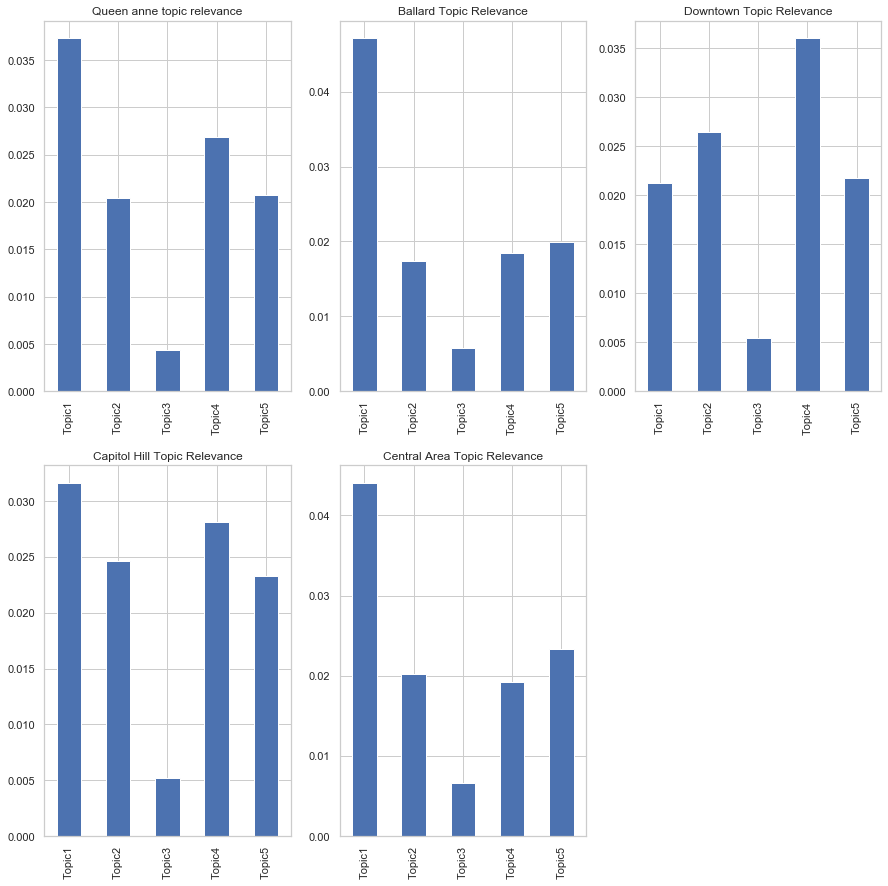

In [57]:
import matplotlib.pyplot as plt

Coefficients=all_H.T
Coefficients=pd.DataFrame(Coefficients,columns=['Topic1','Topic2', 'Topic3','Topic4','Topic5'])

f, axs = plt.subplots(2,2,figsize=(15,15))


plt.subplot(231)
qa=Coefficients[:999]
qa.mean().plot(kind='bar')
plt.title('Queen anne topic relevance')


plt.subplot(232)
b=Coefficients[1000:1999]
b.mean().plot(kind='bar')
plt.title("Ballard Topic Relevance")


plt.subplot(233)
dt=Coefficients[2000:2999]
dt.mean().plot(kind='bar')
plt.title("Downtown Topic Relevance")

plt.subplot(234)
ch=Coefficients[3000:3999]
ch.mean().plot(kind='bar')
plt.title("Capitol Hill Topic Relevance")


plt.subplot(235)
ca=Coefficients[4000:4999]
ca.mean().plot(kind='bar')
plt.title("Central Area Topic Relevance")

plt.show()

#### Outcome

While some neighborhoods seem to have similar distributions in topic presence, some pretty clear distinctions can be made in terms of feature presence when we check how often features from certain topics show up in each neighborhood by comparing their H coefficient. This analysis can potentially help a consumer or new user see which neighborhood they'd like to stay in, by seeing which topic resembles their preferences more.

### Part Three - Explore price change of Seattle Airbnb

We finalize our project by analyzing the prices, in an attempt to find the average price changes throughout the year 2016 and 2017. We will be using the dataframe calendar, which includes the lising ids, date, and price. We will sort the datas by group and compute a seaborn bar plot to show the price in months.

In [63]:
calendar = pd.read_csv("calendar.csv")
calendar

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


After reading the data into notebook, we can start by cleaning out all the NaN values. Then we change price into float values so that we could use it to find the average. Then we make sure that the data doesn't include any invalide values. We continue to group the data by date in order to compute the average price in each time interval.

In [64]:
#Try to clear out NaN values
calendar.dropna(inplace=True)

price = calendar['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
calendar['price']=prices
calendar = calendar[calendar.price >= 0]
calendar['Year'],calendar['Month'],calendar['Day']=calendar['date'].str.split('-',2).str

Text(0.5, 1.0, 'Seattle Airbnb prices change over months')

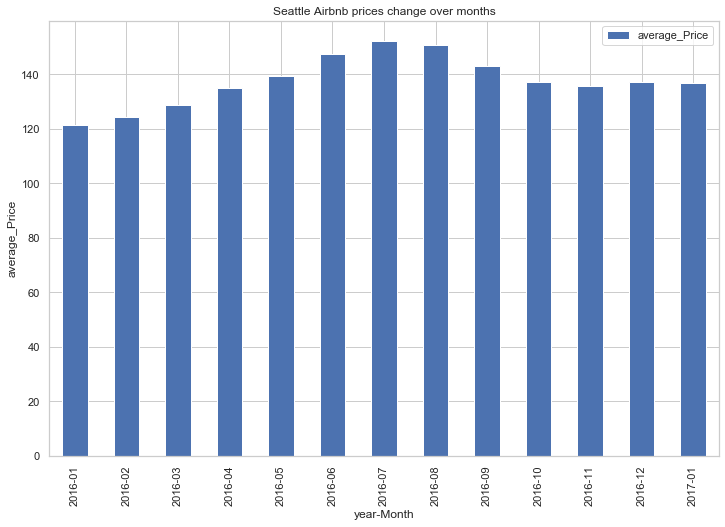

In [65]:
# Group the dataframe by year and month to find the price mean
calendarDF=calendar.groupby(['Year','Month']).price.mean()
calendarDF=calendarDF.reset_index()
calendarDF=calendarDF.rename(columns={'price':'average_Price'})
calendarDF['year-Month']=calendarDF['Year'].map(str) + "-" + calendarDF['Month'].map(str)

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

ax = calendarDF.plot(kind='bar')
ax.set_xlabel('year-Month')
ax.set_xticklabels(calendarDF["year-Month"])
ax.set_ylabel('average_Price')
ax.set_title('Seattle Airbnb prices change over months')

#### Price for Neighbourhood
In this section we will take the dataframe listing and look at the average price for each neighborhood. We did the same thing as before. We removed all the invalid values and change price into a float value.

In [67]:
listing = pd.read_csv("listings.csv")
listing.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [68]:
#Try to clear out NaN values
listing.fillna(0, inplace=True)
listing = listing[listing.price != 0]

price = listing['price']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
    
listing['price']=prices
listing = listing[listing.price >= 0]

Text(0.5, 1.0, 'Average prices for Neighborhood')

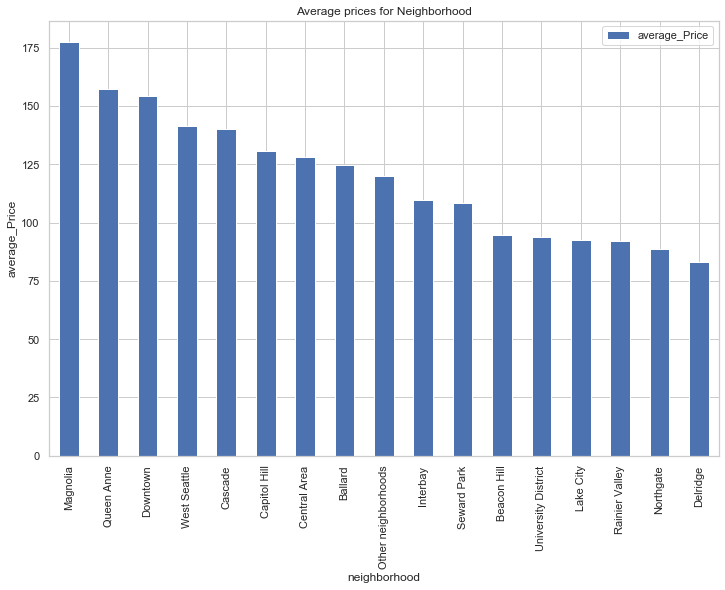

In [69]:
#group data frame by neighborhood
neighborhood_price = listing.groupby(['neighbourhood_group_cleansed']).price.mean().sort_values(ascending=False)
neighborhood_price=neighborhood_price.reset_index()
neighborhood_price=neighborhood_price.rename(columns={'price':'average_Price'})

#plot of average price for all the neighborhood
ax = neighborhood_price.plot(kind='bar')
ax.set_xlabel('neighborhood')
ax.set_xticklabels(neighborhood_price["neighbourhood_group_cleansed"])
ax.set_ylabel('average_Price')
ax.set_title('Average prices for Neighborhood')

#### Plotting Line graph for the 5 neighborhoods price
While it is helpful to see the average price throughout the year for every neighborhood, we want to go deeper and check how the prices vary throughout the year for the 5 neighborhoods we have been focusing on.

In [72]:
#select the neighbourhoods that we are focusing on
neighbourhood = listing[(listing["neighbourhood_group_cleansed"] == 'Capitol Hill')|
                        (listing["neighbourhood_group_cleansed"] == 'Downtown') |
                        (listing["neighbourhood_group_cleansed"] == 'Central Area') |
                        (listing["neighbourhood_group_cleansed"] == 'Queen Anne') |
                        (listing["neighbourhood_group_cleansed"] == 'Ballard')]
neighbourhood = neighbourhood[['id','neighbourhood_group_cleansed']]
neighbourhood = neighbourhood.rename(columns={'id':'listing_id'})

result = pd.merge(neighbourhood,calendar)

In [74]:
change = result.groupby(['Year','Month','neighbourhood_group_cleansed']).price.mean()
change = change.reset_index()
change = change.rename(columns={'price':'average_Price'})
change['year-Month']=change['Year'].map(str) + "-" + change['Month'].map(str)

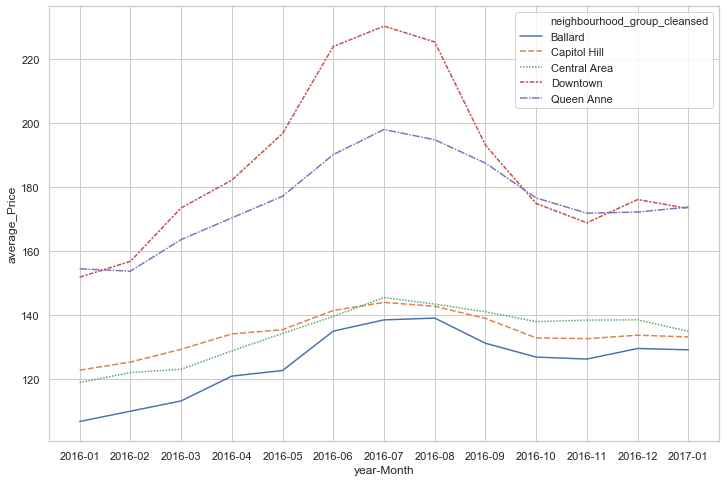

In [76]:
#line plot to show the monthly price change
plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.lineplot(x="year-Month", y="average_Price",
                   hue="neighbourhood_group_cleansed", style="neighbourhood_group_cleansed", data=change)

#### Plotting the percentage changed over the year

After finding out how the prices change over the year, we will show the percent changed throughout the year as well, which can help new users see which "deals" might be the best, since we are going to focus on overall percent dropped or gained in price, as opposed to price itself.

In [80]:
## Percent of price change
neighbourhood_price2 = result.groupby(['neighbourhood_group_cleansed']).price.mean().sort_values(ascending=False)
neighbourhood_price2 = neighbourhood_price2.reset_index()
neighbourhood_price2 = neighbourhood_price2.rename(columns={'price':'average_Price'})

## merge the average price of each neighborhood to the monthly one

increase = pd.merge(change, neighbourhood_price2, on="neighbourhood_group_cleansed")
increase['percent_change'] = (increase['average_Price_x']- increase['average_Price_y'])/increase['average_Price_y']
increase

,Year,Month,neighbourhood_group_cleansed,average_Price_x,year-Month,average_Price_y,percent_change
0,2016,01,Ballard,106.819085,2016-01,125.905980,-0.151596
1,2016,02,Ballard,110.033227,2016-02,125.905980,-0.126068
2,2016,03,Ballard,113.237420,2016-03,125.905980,-0.100619
3,2016,04,Ballard,120.999350,2016-04,125.905980,-0.038971
4,2016,05,Ballard,122.753247,2016-05,125.905980,-0.025040
...,...,...,...,...,...,...,...
60,2016,09,Queen Anne,187.548387,2016-09,176.117882,0.064903
61,2016,10,Queen Anne,176.661936,2016-10,176.117882,0.003089
62,2016,11,Queen Anne,171.903081,2016-11,176.117882,-0.023932
63,2016,12,Queen Anne,172.255945,2016-12,176.117882,-0.021928


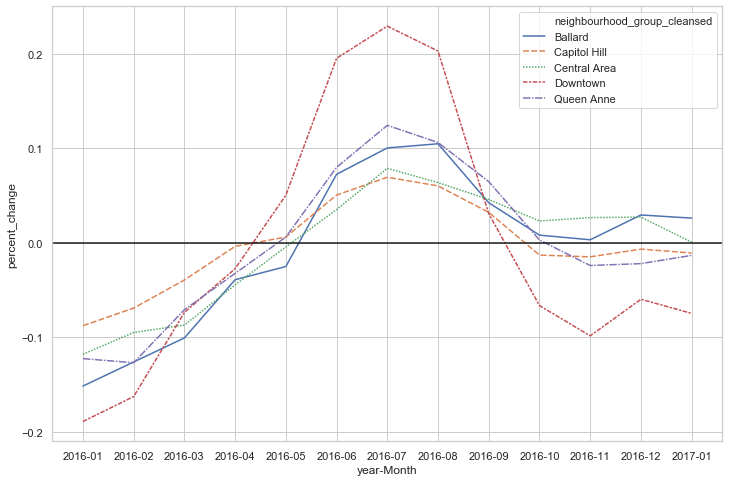

In [81]:
## plot a line graph of percent change in price monthly

plt.rcParams['figure.figsize'] = (12, 8)
ax = sns.lineplot(x="year-Month", y="percent_change",
                   hue="neighbourhood_group_cleansed", style="neighbourhood_group_cleansed", data=increase)
ax.axhline(0, ls='-',color='k')

The line plot above shows the percent change in monthly price based on each neighborhood's average price. The black line indicates zero-percentage change. We can see that for Downtown area, the Airbnbs experienced the most change, for more than 20% from the average during the summer months. The percent price increase for the summer months are similarly around 10% for the other four neighborhoods. 

To conclude, if we are choosing the neighborhood during the summer months, we will choose Central Area or Capitol Hill, since they have the lower average price overall and lower percentage change in price during summer. Travel suggestion overall would be avoiding traveling to Seattle in July to keep the costs low.

# Conclusion & Future Work

With finding the most popular Airbnbs based on the number of reviews and the average ratings, we can recommend these to people that are looking to stay in Seattle. Even if someone wants to stay in a certain neighborhood, they can see how many apartments are located there and give them a better idea of which one to pick. 

By normalizing our user reviews, and then performing a TF-IDF analysis on it, we were able to find the 'weight' for the words used in the reviews for each neighborhood. With that, we performed topic modeling for each neighborhood, showing which words and topics were the most prominent features for each neighborhood in the reviewer's eyes. This can help a new user determine which airbnbs they would want to choose by checking which neighborhood to look for, based on which neighborhood featured words their personal preferences can match with.

After cleaning out NaN values and sorting the data, we calculated the average price for the neighborhoods that we are focusing on. If we are choosing the neighborhood based on budget, Ballard would be our choice due to the lowest average price throughout the year. 

#### Some future work can be done on:
- Some of the reviews in our data set were written with non-Western characters (reviews written in Mandarin or Korean). Could we find a way to take reviews in other languages into account in future analysis?
- How can we take the date when the review was submitted? 2016 versus 2019?
- Can our reviews analysis go deeper into seeing what features people enjoyed the most during their stay in Seattle, and their specific Airbnb?
